In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

170500096/170498071 [==============================] - 52s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [10]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

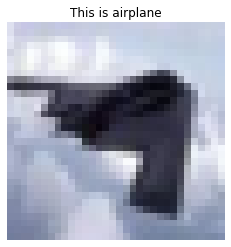

In [25]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, x_train.shape[0]-1)
cat = trans[y_train[i][0]]
plt.title("This is {}".format(cat))
plt.axis("off")
plt.imshow(x_train[i])